# LiFT version in OOPAO
- Notebook with some examples of usage

In [8]:
# general imports
import numpy as np
import matplotlib.pyplot as plt

# OOPAO imports
from OOPAO.Source import Source
from OOPAO.Telescope import Telescope
from OOPAO.Zernike import Zernike
from OOPAO.Detector import Detector

# import LiFT
from OOPAO.LiFT import LiFT
from OOPAO.tools.tools import crop

## Create telescope, source and detector objects

In [9]:
# create the Telescope object
tel = Telescope(resolution = 128, diameter = 10, centralObstruction = 0, samplingTime=5e-3)

# Source
src = Source(optBand = 'H', magnitude = 14)
src*tel

# Zernike base
nModes = 50  # number of zernike to compute

#create a zernike object
Z = Zernike(telObject = tel, J = nModes)

# compute the zernike polynomials associated with the telescope tel
Z.computeZernike(tel)

det = Detector(readoutNoise=4,photonNoise=True)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% TELESCOPE %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
     Diameter             10               [m]        
    Resolution           128             [pixels]     
    Pixel Size           0.08              [m]        
     Surface             79.0              [m2]       
Central Obstruction        0          [% of diameter]  
Pixels in the pupil      12892            [pixels]     
  Field of View           0              [arcsec]     
      Source             None                         
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
No light propagated through the telescope
%%%%%%%%%%%%%%%%%%%%%%%%%%%%% SOURCE %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
 Source Wavelength Zenith  Azimuth   Altitude Magnitude    Flux   
           [m]    [arcsec]  [deg]      [m]              [phot/m2/s]
-------------------------------------------------------------------
  NGS   1.654e-06    0        0        inf    14.000000000000002  7508.4  
%%%%%%%%%%%%%%%%%%%%%%%%

## Test detector

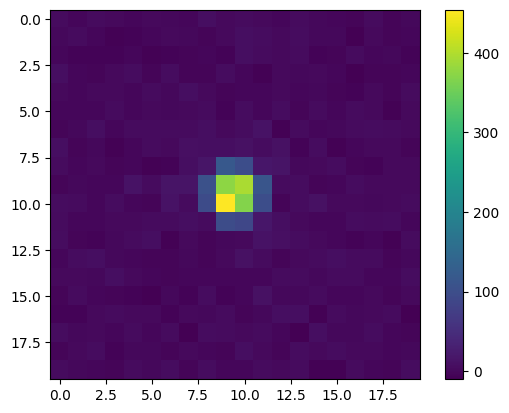

In [10]:
det.readoutNoise = 4
det.phtonNoise = True

#det.integrationTime=10*tel.samplingTime

src*tel*det

plt.imshow(crop(tel.PSF,20,axis=0))
plt.colorbar()
plt.show()

## LiFT - Without noise

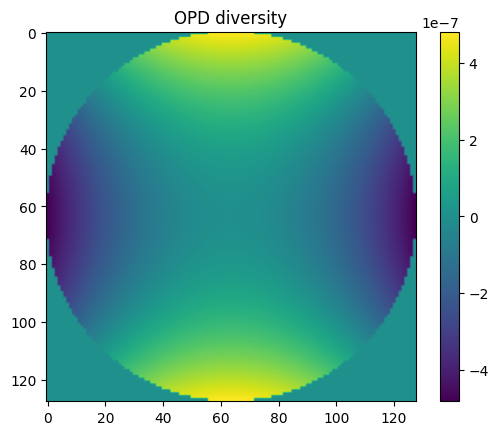

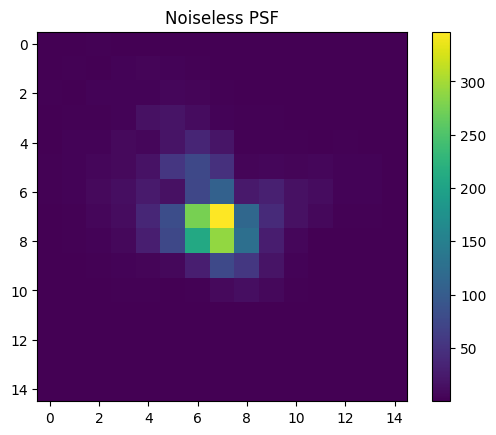

Criterion: 0.0
Mode # 0 0.0
Mode # 1 -0.0
Mode # 2 -0.0
Mode # 3 0.0
Mode # 4 0.0
Mode # 5 -0.0
Mode # 6 -0.0
Mode # 7 -0.0
Mode # 8 -0.0
Mode # 9 -0.0

Criterion: 2.327905514817994
Mode # 0 0.0
Mode # 1 -0.0
Mode # 2 -0.0
Mode # 3 0.0
Mode # 4 -0.0
Mode # 5 -0.0
Mode # 6 -0.0
Mode # 7 -0.0
Mode # 8 0.0
Mode # 9 -0.0

Criterion: 8.897544880928987
Mode # 0 -0.0
Mode # 1 -0.0
Mode # 2 -0.0
Mode # 3 -0.0
Mode # 4 -0.0
Mode # 5 -0.0
Mode # 6 -0.0
Mode # 7 0.0
Mode # 8 0.0
Mode # 9 0.0

Criterion: 61.01941757425373
Mode # 0 -0.0
Mode # 1 0.0
Mode # 2 0.0
Mode # 3 0.0
Mode # 4 0.0
Mode # 5 0.0
Mode # 6 0.0
Mode # 7 0.0
Mode # 8 -0.0
Mode # 9 0.0

Criterion: 768.3182179183289
Mode # 0 0.0
Mode # 1 -0.0
Mode # 2 0.0
Mode # 3 0.0
Mode # 4 -0.0
Mode # 5 -0.0
Mode # 6 0.0
Mode # 7 -0.0
Mode # 8 0.0
Mode # 9 0.0

Criterion: 3405.6091459580766
Mode # 0 0.0
Mode # 1 -0.0
Mode # 2 0.0
Mode # 3 0.0
Mode # 4 -0.0
Mode # 5 -0.0
Mode # 6 0.0
Mode # 7 -0.0
Mode # 8 0.0
Mode # 9 0.0

Criterion: 1853.031720

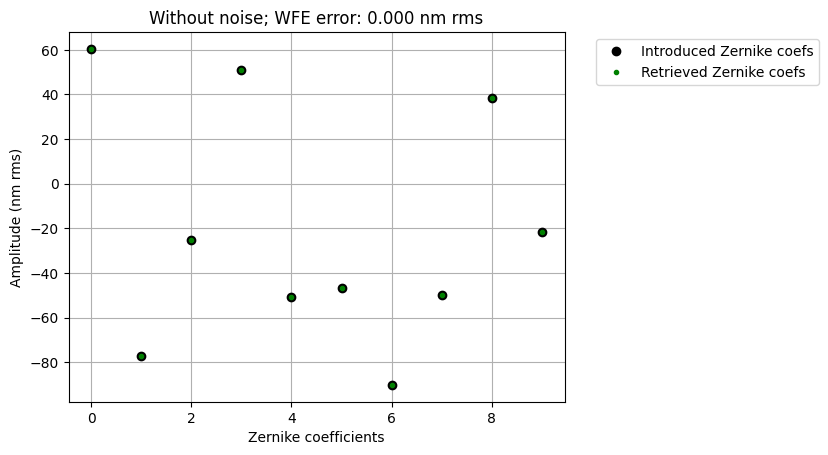

Criterion: 0.0
Mode # 0 0.0
Mode # 1 -0.0
Mode # 2 -0.0
Mode # 3 0.0
Mode # 4 0.0
Mode # 5 -0.0
Mode # 6 -0.0
Mode # 7 -0.0
Mode # 8 -0.0
Mode # 9 -0.0

Criterion: 2.327905514817994
Mode # 0 0.0
Mode # 1 -0.0
Mode # 2 -0.0
Mode # 3 0.0
Mode # 4 -0.0
Mode # 5 -0.0
Mode # 6 -0.0
Mode # 7 -0.0
Mode # 8 0.0
Mode # 9 -0.0

Criterion: 8.897544880928987
Mode # 0 -0.0
Mode # 1 -0.0
Mode # 2 -0.0
Mode # 3 -0.0
Mode # 4 -0.0
Mode # 5 -0.0
Mode # 6 -0.0
Mode # 7 0.0
Mode # 8 0.0
Mode # 9 0.0

Criterion: 61.01941757425373
Mode # 0 -0.0
Mode # 1 0.0
Mode # 2 0.0
Mode # 3 0.0
Mode # 4 0.0
Mode # 5 0.0
Mode # 6 0.0
Mode # 7 0.0
Mode # 8 -0.0
Mode # 9 0.0

Criterion: 768.3182179183289
Mode # 0 0.0
Mode # 1 -0.0
Mode # 2 0.0
Mode # 3 0.0
Mode # 4 -0.0
Mode # 5 -0.0
Mode # 6 0.0
Mode # 7 -0.0
Mode # 8 0.0
Mode # 9 0.0

Criterion: 3405.6091459580766
Mode # 0 0.0
Mode # 1 -0.0
Mode # 2 0.0
Mode # 3 0.0
Mode # 4 -0.0
Mode # 5 -0.0
Mode # 6 0.0
Mode # 7 -0.0
Mode # 8 0.0
Mode # 9 0.0

Criterion: 1853.031720

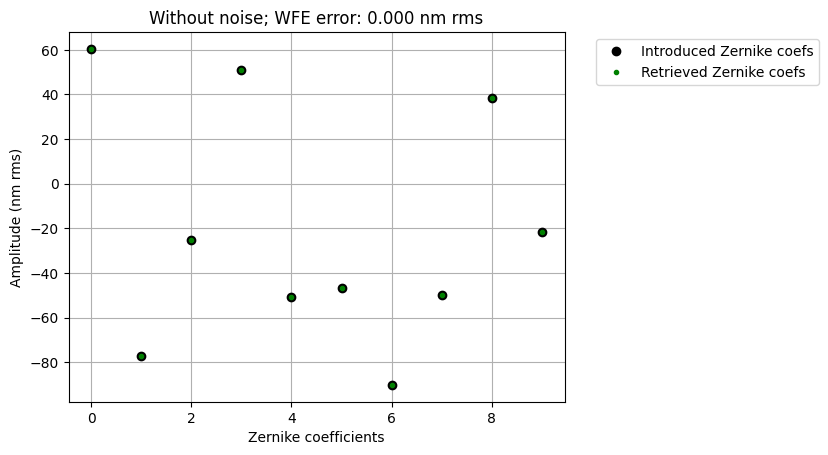

In [11]:
amp_diversity = np.zeros(nModes)
amp_diversity[4] = 200e-9       # 200 nm rms of astigmatism (0º) as phase diversity

diversity_OPD = np.squeeze(Z.modesFullRes@amp_diversity)

plt.imshow(diversity_OPD)
plt.title("OPD diversity")
plt.colorbar()
plt.show()

estimator = LiFT(tel = tel, basis = Z.modesFullRes, det = det, diversity_OPD = diversity_OPD,iterations = 20, \
                  ang_pixel = 20, img_resolution = 15, numerical=False)

# iterations: maximum number of iterations allowed for LiFT algorithm
# ang_pixel: pixel angular size of the detector in mas
# img_resolution: image resolution of the detector

def PSFfromCoefs(coefs,diversity_OPD):

    OPD = np.squeeze(Z.modesFullRes@coefs)
    tel.OPD = OPD + diversity_OPD
    k = 2*np.pi/(tel.src.wavelength)
    # PSF = estimator.PropagateField(amplitude = np.sqrt(tel.src.fluxMap), phase = k*tel.OPD, return_intensity=True)
    tel.PropagateField(amplitude = np.sqrt(tel.src.fluxMap), phase = k*tel.OPD, zeroPaddingFactor = estimator.zeroPaddingFactor, \
                       img_resolution=estimator.img_resolution)
    
    tel.OPD *= 0

    return tel.PSF


def error_analysis(coefs_inp, coefs_out, noise, number_modes):

    WFE = np.sqrt(np.sum((coefs_inp-coefs_out)**2)) # wavefront error in m rms

    plt.plot(np.arange(len(coefs_inp[:number_modes])),coefs_inp[:number_modes]*10**9,"ko",label="Introduced Zernike coefs")
    plt.plot(np.arange(len(coefs_inp[:number_modes])),coefs_out[:number_modes]*10**9,"g.",label="Retrieved Zernike coefs")
    
    if noise == False:
        plt.title("Without noise; WFE error: {:.3f} nm rms".format(WFE*10**9))

    else:
        plt.title("With noise; WFE error: {:.3f} nm rms".format(WFE*10**9))
        
    plt.ylabel("Amplitude (nm rms)")
    plt.xlabel("Zernike coefficients")
    plt.legend(loc="upper left",bbox_to_anchor=(1.05,1))
    plt.grid()
    plt.show()


# random coefficients used to genearte PSF (ground-truth values)
coefs_0 = np.zeros(nModes,dtype=float)
number_modes = 10

coefs_0[:number_modes] = np.random.uniform(-100, 100, number_modes)*1e-9 # [m]  random coefficients

# PSF generation with given coefs_0 + diversity
PSF_test = PSFfromCoefs(coefs_0,diversity_OPD)

# PSF_test /= np.sum(PSF_test)

plt.imshow(PSF_test)
plt.title("Noiseless PSF")
plt.colorbar()
plt.show()

modes = [0,1,2,3,4,5,6,7,8,9]

# By default LiFT will stop iterations once its convergence criterias are met
coefs_1, PSF_1, _ = estimator.Reconstruct(PSF_test, R_n='model', mode_ids=modes, verbous=True, optimize_norm='sum',check_convergence=True)
error_analysis(coefs_inp = coefs_0, coefs_out = coefs_1, noise = False, number_modes = number_modes)

# test check_convergence = False; LiFT will continue iterating until it reaches the maximum number of iterations
coefs_1, PSF_1, _ = estimator.Reconstruct(PSF_test, R_n='model', mode_ids=modes, verbous=True, optimize_norm='sum',check_convergence=False)
error_analysis(coefs_inp = coefs_0, coefs_out = coefs_1, noise = False, number_modes = number_modes)

## With noise

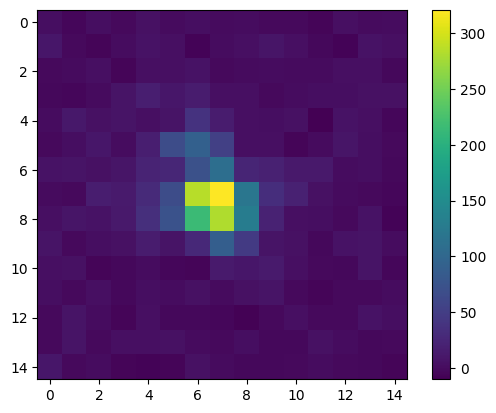

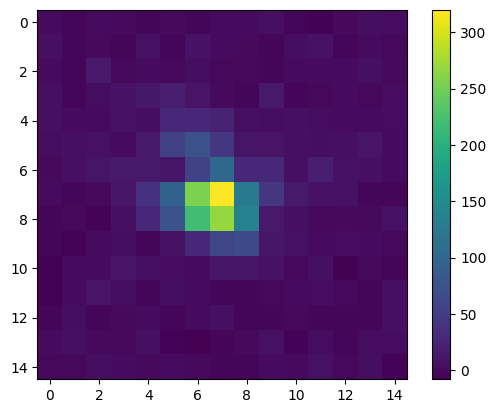

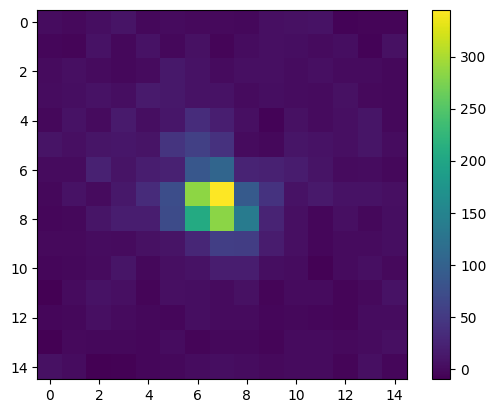

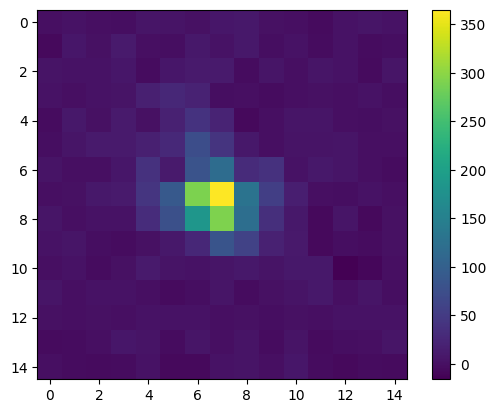

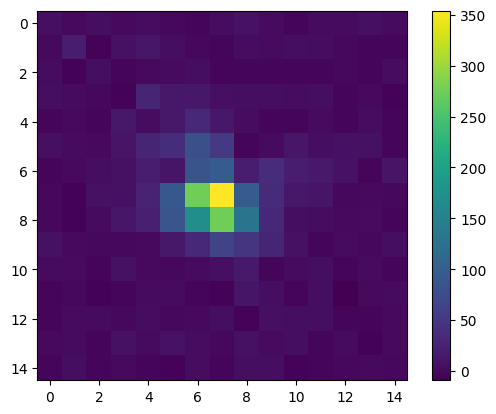

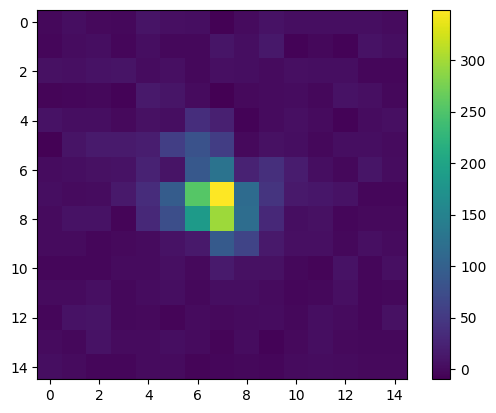

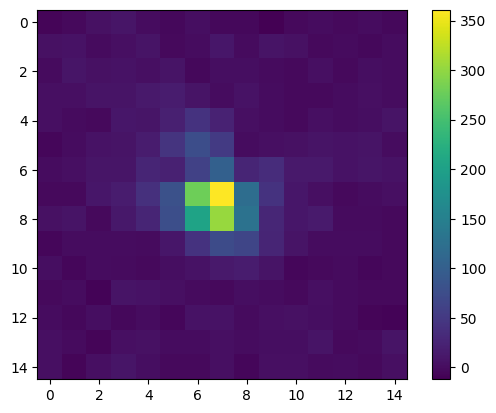

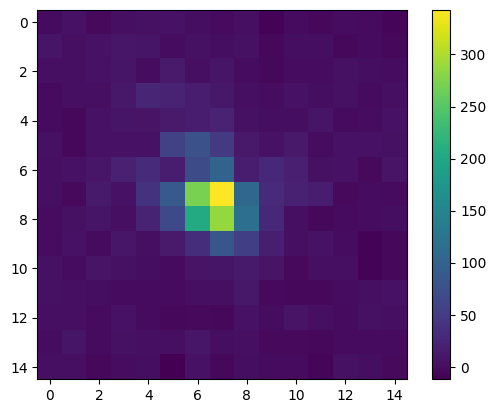

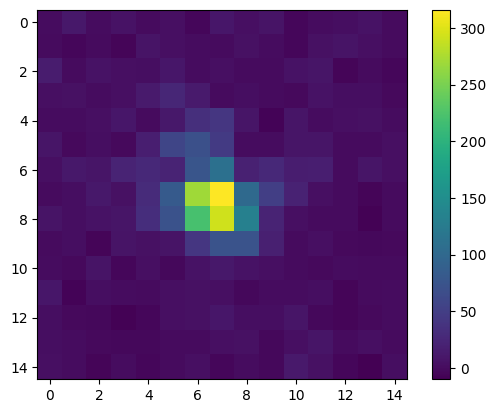

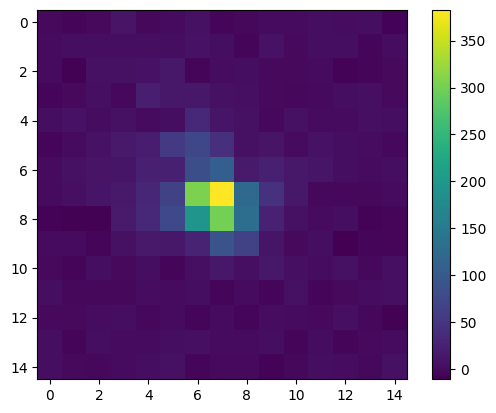

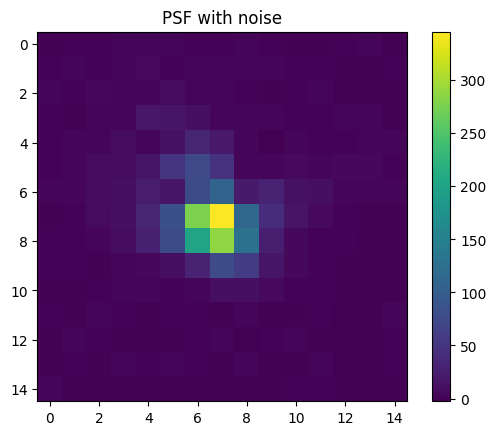

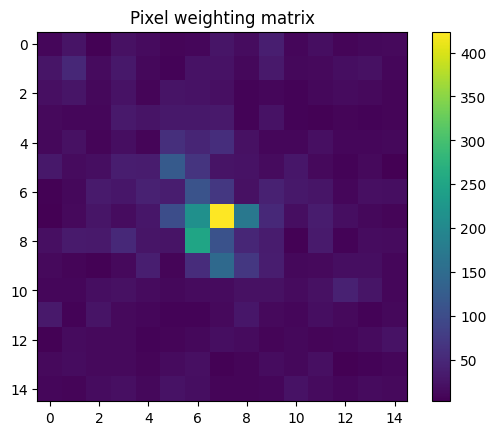

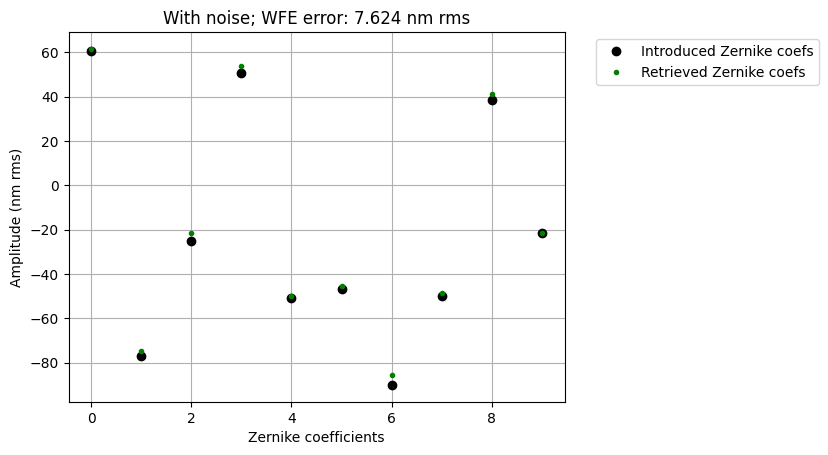

In [12]:
# considering noise
PSF_test = PSFfromCoefs(coefs_0,diversity_OPD)

samples = 10

data_cube = np.zeros((samples,estimator.img_resolution,estimator.img_resolution),dtype=float)

for i in range(samples):
    det.integrate(frame=PSF_test)
    PSF = det.frame
    
    plt.imshow(PSF)
    plt.colorbar()
    plt.show()
    
    data_cube[i,:,:] = PSF

PSF_noisy = data_cube.mean(axis=0)

# PSF_noisy /= np.sum(PSF_noisy)

R_n = data_cube.var(axis=0)

plt.imshow(PSF_noisy)
plt.title("PSF with noise")
plt.colorbar()
plt.show()

plt.imshow(R_n)
plt.title("Pixel weighting matrix")
plt.colorbar()
plt.show()

coefs_1, PSF_1, _ = estimator.Reconstruct(PSF_noisy, R_n=R_n, mode_ids=modes,verbous=False, optimize_norm='sum')

error_analysis(coefs_inp = coefs_0, coefs_out = coefs_1, noise = True, number_modes = number_modes)